In [3]:
#Import libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Load the file.

df = pd.read_csv('marketing_AB.csv')

In [5]:
#Summary of data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [4]:
#Check for null values.

df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [18]:
#Remove columns not needed. 

df.drop(['Unnamed: 0','user id'], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [7]:
#Count of number of unique values. 

df.nunique()

test group         2
converted          2
total ads        807
most ads day       7
most ads hour     24
dtype: int64

In [8]:
#Return the array of unique values. 

df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [43]:
df_unique_arrays = df[['test group','converted','most ads day','most ads hour']]

for i in df_unique_arrays:
    print(i.upper(), ':', df[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


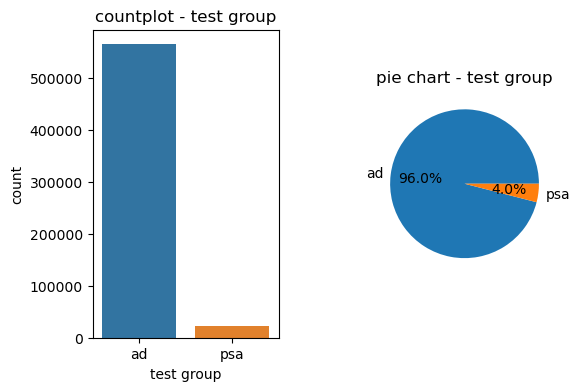

In [20]:
#Univariate Analysis. 

variable = 'test group'

plt.figure(figsize=(6,4))

#Create countplot

plt.subplot(1,2,1)
sns.countplot(x='test group', data=df_unique_arrays)
plt.title(f'countplot - {variable}')

#Create pie-chart.

plt.subplot(1,2,2)
counts = df_unique_arrays[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.1f%%')
plt.title(f'pie chart - {variable}')

#Ajust layout.
plt.subplots_adjust(wspace=0.5 , hspace=0.5)

#Show plot.
plt.show()


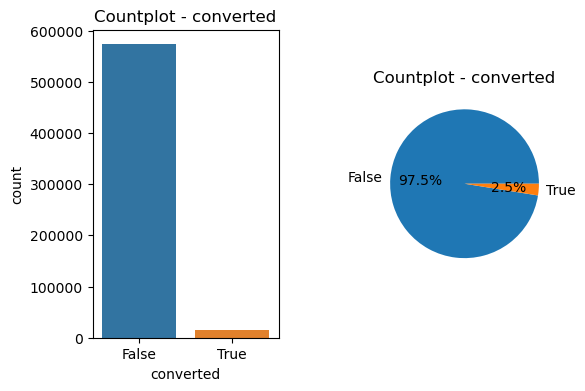

In [29]:
#We check the 'converted' column.

variable = 'converted'

plt.figure(figsize=(6,4))

#Create a countplot.
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_unique_arrays)
plt.title(f'Countplot - {variable}')

#Create a pie-chart.
plt.subplot(1,2,2)
counts = df_unique_arrays[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.1f%%')
plt.title(f'Countplot - {variable}')

#Adjust layout.
plt.subplots_adjust(wspace=0.5 , hspace=0.5)

#Show plot.
plt.show()

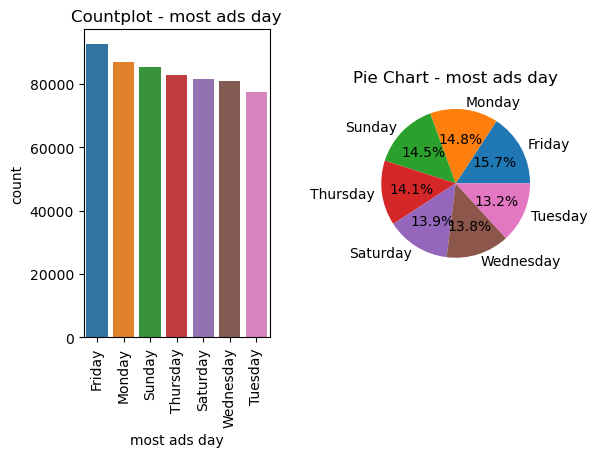

In [41]:
#Check for 'most ads day'.

variable = 'most ads day'

plt.figure(figsize=(6,4))

#Create countplot.
plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_unique_arrays, order = df_unique_arrays[variable].value_counts().index)
plt.title(f'Countplot - {variable}')
plt.xticks(rotation = 90)

#Create pie-chart.
plt.subplot(1,2,2)
counts = df_unique_arrays[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.1f%%')
plt.title(f'Pie Chart - {variable}')


#Ajust layout.
plt.subplots_adjust(wspace=0.5 , hspace=0.5)

#Show plot.
plt.show()

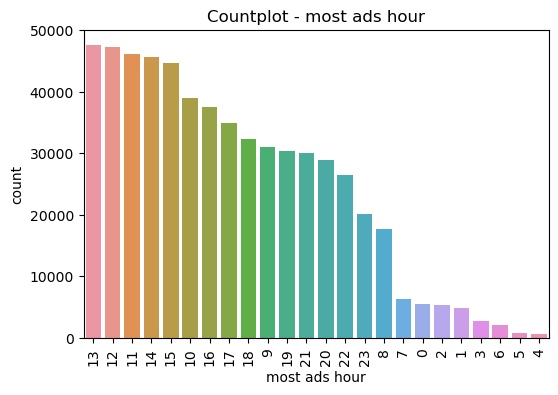

In [47]:
#Check for 'most ads hour'.

variable = 'most ads hour'
plt.figure(figsize=(15,4))

#Create countplot.

plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_unique_arrays, order = df_unique_arrays[variable].value_counts().index)
plt.title(f'Countplot - {variable}')
plt.xticks(rotation = 90)

#Adjust subplots layout.
plt.subplots_adjust(wspace=0.5 , hspace = 0.5)

#Show plot.
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


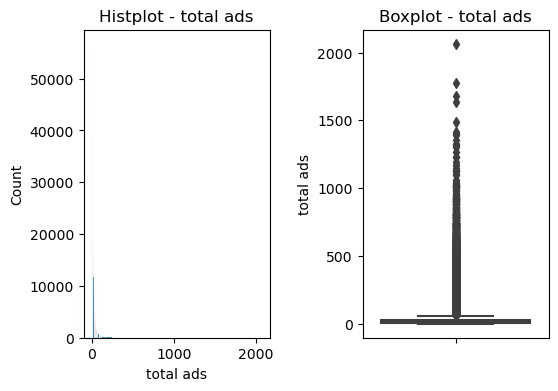

In [48]:
#Plots for 'total ads'.

variable = 'total ads'
plt.figure(figsize=(6,4))

#Create countplot. 
plt.subplot(1,2,1)
sns.histplot(x = variable, data = df)
plt.title(f'Histplot - {variable}')

#Create pie-chart.
plt.subplot(1,2,2)
sns.boxplot(y = variable, data = df)
plt.title(f'Boxplot - {variable}')

#Adjust subplots layout.
plt.subplots_adjust(wspace = 0.5 , hspace = 0.5)

#Show plot.
plt.show()


In [49]:
#Check the descriptive statistics of 'total ads'.

df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


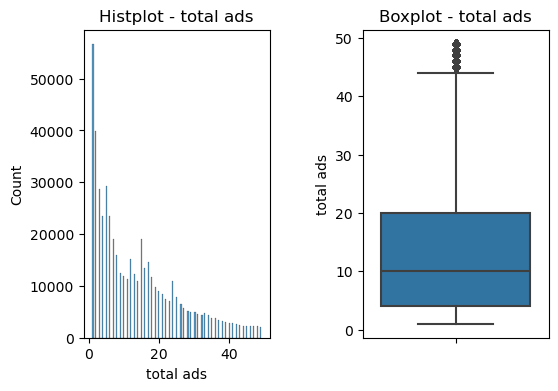

In [8]:
#Calculation for outliers based on results ontained from descriptive statitics.
#To identify outliers, we can use the interquartile range (IQR) method:

#Calculate the IQR (Interquartile Range): IQR = Q3 - Q1
#IQR = 27 - 4 = 23

#Define the lower and upper bounds for outliers:
#Lower Bound = Q1 - 1.5 * IQR
#Upper Bound = Q3 + 1.5 * IQR
#Any data point that falls below the Lower Bound or above the Upper Bound can be considered an outlier.

#Calculating the bounds:

#Lower Bound = 4 - 1.5 * 23 = -30.5
#Upper Bound = 27 + 1.5 * 23 = 65.5

#So, any value less than approximately -30.5 or greater than approximately 65.5 can be considered an outlier.

#For better visualization we filter out outliers. 

variable = 'total ads'
plt.figure(figsize=(6,4))

#Create histogram.
plt.subplot(1,2,1)
sns.histplot(x = variable , data=df[(df[variable] < 50)])
plt.title(f'Histplot - {variable}')

#Create boxplot.
plt.subplot(1,2,2)
sns.boxplot(y = variable , data = df[(df[variable] < 50)])
plt.title(f'Boxplot - {variable}')

#Adjust subplots layout.
plt.subplots_adjust(wspace = 0.5 , hspace = 0.5)

#Show plot.
plt.show()


In [20]:
#Bivariate analysis. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [16]:
#Check for conversion rates for each test case. 

df_test_group_conversion_rate = pd.crosstab(df['test group'] , df['converted'] , normalize = 'index')
df_test_group_conversion_rate

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

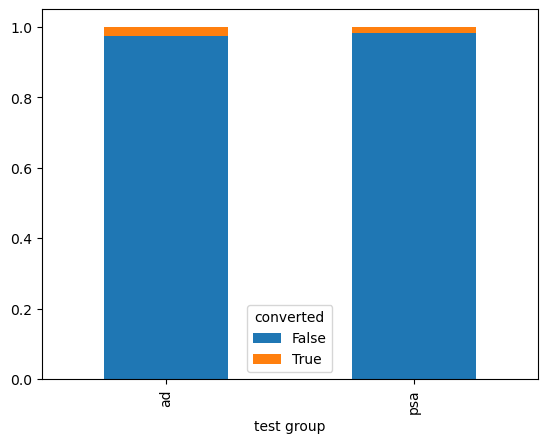

In [17]:
#Therefore, we can tell that for test group ad the conversion rate is 2.5% which is higher than the conversion rate for psa which is 1.7%.

df_test_group_conversion_rate.plot.bar(stacked = True)

In [35]:
df_most_ads_day_conversion_rate = pd.crosstab(df['most ads day'] , df['converted'] , normalize = 'index')
df_most_ads_day_conversion_rate.sort_values(by = True , ascending = False)

converted,False,True
most ads day,,
Monday,0.967188,0.032812
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942
Sunday,0.975524,0.024476
Friday,0.977788,0.022212
Thursday,0.978429,0.021571
Saturday,0.978949,0.021051


<Axes: xlabel='most ads day'>

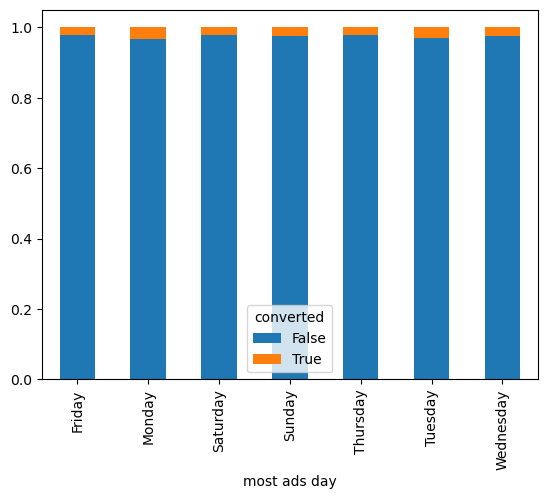

In [23]:
df_most_ads_day_conversion_rate.plot.bar(stacked = True)

In [36]:
df_most_ads_hour_conversion_rate = pd.crosstab(df['most ads hour'] , df['converted'] , normalize = 'index')
df_most_ads_hour_conversion_rate.sort_values(by =True , ascending = False)

converted,False,True
most ads hour,,
16,0.969228,0.030772
20,0.970197,0.029803
15,0.970347,0.029653
21,0.971077,0.028923
17,0.971790,0.028210
14,0.971937,0.028063
18,0.972620,0.027380
19,0.973280,0.026720
22,0.973895,0.026105


<Axes: xlabel='most ads hour'>

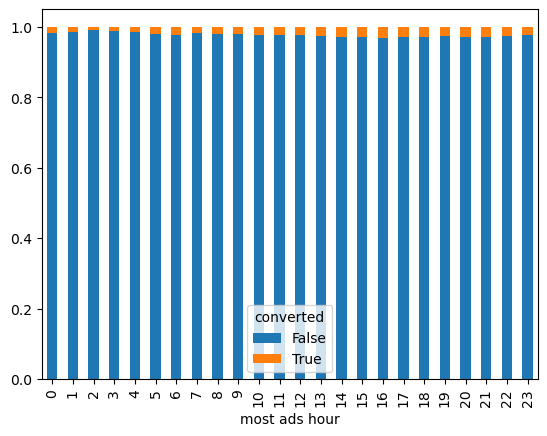

In [29]:
df_most_ads_hour_conversion_rate.plot.bar(stacked = True)

<Axes: xlabel='converted', ylabel='total ads'>

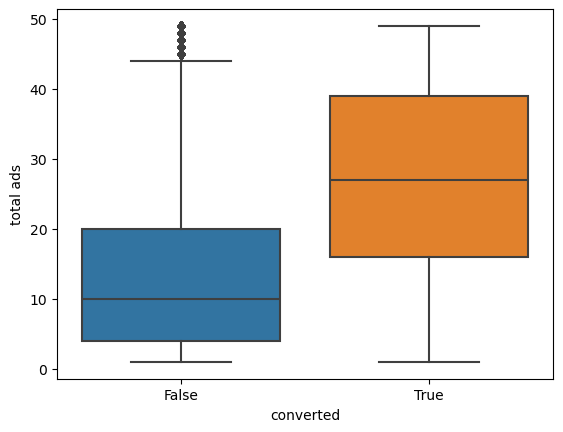

In [37]:
#Create boxplot from 'total ads'(viewed by customers) and 'converted' columns.

sns.boxplot(x = 'converted' , y = 'total ads' , data = df[(df['total ads'] < 50)])

In [41]:
#Statistical tests. 
#We need to import new libraries. 

from scipy.stats import chi2_contingency

alpha = 0.05

for variable in df.columns:
    if variable != 'converted' and variable != 'total ads':
        #Add crosstab or creation of contingency table. 
        contingency_table = pd.crosstab(df[variable] , df['converted'])
        
        #Perform chi-square test: Below 'chi2,' is tested statistics , 'p' is p-value , '_,' is degree of freedom and '_' is expected frequency. 
        chi2, p, _, _ = chi2_contingency(contingency_table)

        #Display results. 
        print(f'\nChi-squared test for {variable} vs converted')
        print(f'Chi-squared value - {chi2}')
        print(f'p-value : {p}')

        #Check for significance.
        if p < alpha:
            print(f'The difference in conversion rates across {variable} is statitically significant.')          #In this case we reject null hypothesis. [null hypothesis is that there is no difference in conversion rates wrt categorical variables with multiple levels.]
        else:
            print(f'The difference in conversion rates across {variable} is not significant')                    #In this case we fail to reject null hypothesis. 



Chi-squared test for test group vs converted
Chi-squared value - 54.005823883685245
p-value : 1.9989623063390075e-13
The difference in conversion rates across test group is statitically significant.

Chi-squared test for most ads day vs converted
Chi-squared value - 410.0478857936585
p-value : 1.932184379244731e-85
The difference in conversion rates across most ads day is statitically significant.

Chi-squared test for most ads hour vs converted
Chi-squared value - 430.76869230822086
p-value : 8.027629823696771e-77
The difference in conversion rates across most ads hour is statitically significant.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [44]:
df_unique_arrays.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [47]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#Step.1. Check assumptions.
#Normality assumption. 

shapiro_stat_true , shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false , shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f'Shapiro_Wilk test for Normality (True group): p-value = {shapiro_p_value_true}')
print(f'Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}')

#Equality of variances assumption. 
levene_stat , levene_p_value = levene(df[df['converted']]['total ads'] , df[~df['converted']]['total ads'])
print(f'Levene test for equality of variances: p-value = {levene_p_value}')

Shapiro_Wilk test for Normality (True group): p-value = 0.0
Shapiro-Wilk test for normality (False group): p-value = 0.0
Levene test for equality of variances: p-value = 0.0


In [48]:
#Step.2.perform a Suitable test. 

alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    #If assumptions met, use t-test for means.
    t_stat , t_p_value = ttest_ind(df[df['converted']]['total ads'] , df[~df['converted']]['total ads'])
    print(f'Independent two-sample t-test: p-value = {t_p_value}')
else:
    #If assumptions not met, use Mann-Whitney U test for medians.
    u_stat , u_p_value = mannwhitneyu(df[df['converted']]['total ads'] , df[~df['converted']]['total ads'])
    print(f'Mann-Whitney U test: p-value = {u_p_value}')
    

Mann-Whitney U test: p-value = 0.0
